# LAB 1 MACHINE LEARNING
KIESGEN DE RICHTER Stanislas, PRECIGOUT Gabriel

We will work on a peak power plant dataset and will do predictions on the power output allowing to link the power plant to the power grid.

 ## Part 1: Linear Regression from Scratch
First we import libraries and import our data as a single dataframe as it is a 5 sheet excel document at the beginning. 

In [ ]:
#Import and Hyper parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
alpha = 0.03
iter_ = 10000
delta = 0.0000001

In [ ]:
df = pd.concat(pd.read_excel ("data/Folds5x2_pp.xlsx",sheet_name=None), ignore_index=True)
print (df)

          AT      V       AP     RH      PE
0      14.96  41.76  1024.07  73.17  463.26
1      25.18  62.96  1020.04  59.08  444.37
2       5.11  39.40  1012.16  92.14  488.56
3      20.86  57.32  1010.24  76.64  446.48
4      10.82  37.50  1009.23  96.62  473.90
...      ...    ...      ...    ...     ...
47835  15.12  48.92  1011.80  72.93  462.59
47836  33.41  77.95  1010.30  59.72  432.90
47837  15.99  43.34  1014.20  78.66  465.96
47838  17.65  59.87  1018.58  94.65  450.93
47839  23.68  51.30  1011.86  71.24  451.67

[47840 rows x 5 columns]


In this data set we have 4 features and one output :   
Features:  
- AT: Ambient Temperature in the range 1.81°C and 37.11°C
- V: Exhaust Vacuum in the range 25.36-81.56 cm Hg
- AP: Ambient Pressure in the range 992.89-1033.30 milibar
- RH: Relative Humidity in the range 25.56% to 100.16%

Output :
- PE: Net hourly electrical energy output 420.26-495.76 MW




In [ ]:
Xdata=df[["AT","V","AP","RH"]]
print(Xdata.head(10))
Ydata=df[["PE"]]
print(Ydata.head(10))

      AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
5  26.27  59.44  1012.23  58.77
6  15.89  43.96  1014.02  75.24
7   9.48  44.71  1019.12  66.43
8  14.64  45.00  1021.78  41.25
9  11.74  43.56  1015.14  70.72
       PE
0  463.26
1  444.37
2  488.56
3  446.48
4  473.90
5  443.67
6  467.35
7  478.42
8  475.98
9  477.50


Our split processed properly but the features are not scalled so we need to do it.  
We will use a Z-score method that we will implement along the other functions required to create our model.

### Function definition

In [ ]:
def Zscaling(dataframe): #scale our features
    std = dataframe.std(axis = 0)
    mean = dataframe.mean(axis = 0)
    return ((dataframe-mean)/std)

In [ ]:
def costfunction(Xnew, Ydata, theta): #calculate the cost
    m = len(Ydata)
    result = np.sum(((Xnew.dot(theta) - Ydata) ** 2)/(2 * m))
    return result

In [ ]:
def batch_gradient_descent(Xdata, Ydata, theta, alpha, iterations, delta): #from scratch gradient descent
 cost_history =[]
 m = len(Ydata)
 
 for iteration in range(iterations):

    #Values predicted at each iteration of the model
    h = Xdata.dot(theta)

    # Difference between predictions and Actual Y
    loss = h - Ydata

    # Gradient Calculation
    gradient = Xdata.T.dot(loss) / m

    # Changing Values of theta using Gradient
    theta = theta - alpha * gradient 

    # New Cost Value added to the cost list
    cost = costfunction(Xdata, Ydata, theta)
    cost_history.append(cost)
    if( (iteration!= 0 and 1-np.abs(cost_history[-1])/np.abs(cost_history[-2]) < delta) or (iteration==iterations-1) ): # If the new cost² is inferrior to a delta % of last cost² or we reach max iteration we print and leave the loop  
      print("done in ",iteration+1,"iterations")
      print("\nprevious cost")
      print(cost_history[-2])
      print("last cost")
      print(cost_history[-1])


      break
    if(iteration!=0 and np.abs(cost_history[-1])>np.abs(cost_history[-2] )): # if we go to far we reduce our learning rate alpha
      alpha = alpha/1.5

 return theta, cost_history

In [ ]:
def MAE(actual, predicted):
    error = 0.0
    for i in range (len(actual)):
        error += abs(actual[i] - predicted[i])
    return error / float(len(actual))

In [ ]:
def RMSE(actual, predicted):
    error =0.0
    for i in range(len(actual)):
        predictionError = predicted[i] - actual[i]
        error += (predictionError ** 2)
    meanError = error / float(len(actual))
    return math.sqrt(meanError)

### Data scaling and split

In [ ]:
Xscaled= Zscaling(Xdata)
print(Xscaled.head(10))

         AT         V        AP        RH
0 -0.629513 -0.987286  1.820469 -0.009519
1  0.741901  0.681038  1.141851 -0.974610
2 -1.951277 -1.173005 -0.185076  1.289826
3  0.162204  0.237201 -0.508388  0.228158
4 -1.185056 -1.322525 -0.678463  1.596683
5  0.888168  0.404033 -0.173288 -0.995844
6 -0.504717 -0.814158  0.128133  0.132265
7 -1.364870 -0.755137  0.986931 -0.471174
8 -0.672453 -0.732316  1.434852 -2.195872
9 -1.061602 -0.845636  0.316732 -0.177331


In [ ]:
Xscaled.insert(0,"x0",1)  # add a column of 1 for the offset x0
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xscaled,Ydata,random_state = 3)
Xtrain=Xtrain.to_numpy()
Xtest=Xtest.to_numpy()
Ytrain=Ytrain.to_numpy()
Ytest=Ytest.to_numpy()
print("Xtrain \n",Xtrain)
print("Ytrain \n",Ytrain)

Xtrain 
 [[ 1.         -1.55407675 -1.04630717  1.6840721   1.6569581 ]
 [ 1.         -1.84660932 -1.12028004  0.9650396  -0.69720658]
 [ 1.         -0.56107629 -0.61584803 -0.93778647  1.21653683]
 ...
 [ 1.          0.7687392   0.75265004  0.91620601 -1.4266757 ]
 [ 1.         -0.71405203 -1.22573073 -1.63997981  0.86378885]
 [ 1.         -1.33132259 -1.04630717  1.43148457  1.671342  ]]
Ytrain 
 [[474.09]
 [493.9 ]
 [462.58]
 ...
 [442.13]
 [468.86]
 [469.11]]


To use an offset we added a column of 1s to our dataset leading to the first index of theta corresponding to the offset x0

## Model Training

done in  1700 iterations

previous cost
10.30463540016024
last cost
10.304634369987193
Theta result:
 [[ 4.54355395e+02]
 [-1.47058793e+01]
 [-2.98749647e+00]
 [ 3.66468795e-01]
 [-2.29096432e+00]]
Plot of the entirety of the cost history and last 100 iterations:


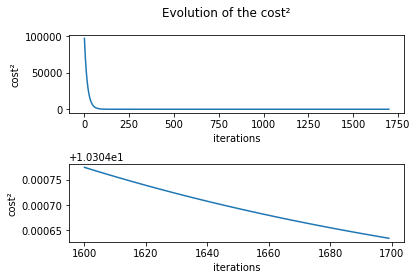

In [ ]:
theta = np.zeros(Xtrain.shape[1]) # we create an array of 0's of the number of features and turn it vertically using np.vstack
theta = np.vstack(theta)

newTheta, cost_history = batch_gradient_descent(Xtrain, Ytrain, theta, alpha, iter_,delta)

print("Theta result:\n",newTheta)
#roundedcostforplot = cost_history.round(decimals=2)

fig, axs = plt.subplots(2)

fig.tight_layout(pad=3.0)
fig.suptitle('Evolution of the cost²')

axs[0].plot(np.arange(len(cost_history)),cost_history)
axs[0].set(xlabel="iterations")
axs[0].set(ylabel="cost²")

axs[1].plot(np.arange(len(cost_history)-100, len(cost_history)  ),cost_history[-100:])
axs[1].set(xlabel="iterations")
axs[1].set(ylabel="cost²")
print("Plot of the entirety of the cost history and last 100 iterations:")

With an equation of 454 - 14.7 AT -2.98 V +0.366 AP -2.29 RH   our model reached a cost of ~= 10.30 on our train set, we will now evaluate it on our test set.

# Evaluating and testing our model

To evaluate our model we will check the R², MAE and RMSE

In [ ]:
def pred(Xdata, theta):

	Yhat=Xdata.dot(theta)

	return Yhat

In [ ]:

Yhat = pred(Xtest,newTheta)
Yhat

array([[448.07259989],
       [454.67238407],
       [445.87956227],
       ...,
       [469.68961839],
       [473.10709493],
       [472.96275778]])

In [ ]:
def r2(Ytest, Yhat):
 nomi = np.sum((Ytest - Yhat )**2)
 denom = np.sum((Ytest -Ytest.mean() ) **2)
 r2 = 1-  (nomi / denom)
 return(r2)
#----------------

scratR2=r2(Ytest, Yhat)
skR2=r2_score(Ytest, Yhat)
print("our r² caluclation",scratR2)
print("sklearn calculation",skR2)

our r² caluclation 0.9271401158429676
sklearn calculation 0.9271401158429676


We have the same result with our calculation and sklearn one but will stick with sklearn to be even more sure of our results. 

### Mean Absolute Error

In [ ]:
meanAbsoluteError = MAE(Ytest, Yhat)
meanAbsoluteError

array([3.65756703])

### Root Mean Square Error

In [ ]:
RootMeanSquareError = RMSE(Ytest, Yhat)
RootMeanSquareError

4.609055580947189

Our values seem low but we need to compare with sklearn to be sure.

# Part 2: Compare with Sklearn

In [ ]:
skmodel = LinearRegression().fit(Xtrain, Ytrain)
skpredict= skmodel.predict(Xtest)
print("sklearn model score:",r2_score(Ytest, skpredict),"\nOur model score:",r2_score(Ytest,Yhat),"\nscore difference:",np.abs(r2_score(Ytest,skpredict)-r2_score(Ytest,Yhat)) )

sklearn model score: 0.9271379228686519 
Our model score: 0.9271401158429676 
score difference: 2.1929743156956505e-06


We have a score really close to the sklearn model (<0.0001 difference), showing that our model is working as it should. 

In [ ]:
skMAE = mean_absolute_error(Ytest, skpredict)
print("sklearn Mean Absolute Variable:",skMAE,"\nOur model MAE:", float(meanAbsoluteError),"\nDifference:", float(abs(skMAE-meanAbsoluteError)))

sklearn Mean Absolute Variable: 3.6573282084567476 
Our model MAE: 3.6575670281814237 
Difference: 0.00023881972467609813


In [ ]:
skRMSE = mean_squared_error(Ytest, skpredict,squared=False)
print("sklearn Root Mean Square Error:",skRMSE,"\nOur model RSME:", float(RootMeanSquareError),"\nDifference:", float(abs(skRMSE-RootMeanSquareError)))

sklearn Root Mean Square Error: 4.609124943289516 
Our model RSME: 4.609055580947189 
Difference: 6.936234232757243e-05


Our RMSE (unsquared version), MAE and R² are really close to the sklearn model values, meaning that our model methods are quite good and can be compared to the ones from a pyhton library

## Part 3: Normal Equation

In [ ]:
w = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(Ytrain)
print("Normal equations theta\n",w)
R2n=r2(Xtest.dot(w),Ytest)
print("Normal equations R2",R2n)

print("Our model theta\n",newTheta)
print("Our model R2",skR2)

Normal equations theta
 [[ 4.54355463e+02]
 [-1.47497541e+01]
 [-2.95501282e+00]
 [ 3.58216520e-01]
 [-2.30517122e+00]]
Normal equations R2 0.9211210497844189
Our model theta
 [[ 4.54355395e+02]
 [-1.47058793e+01]
 [-2.98749647e+00]
 [ 3.66468795e-01]
 [-2.29096432e+00]]
Our model R2 0.9271401158429676


Most of our values are really close to the one from the normal equations, with less than 3% shift on every theta weight. 

This concludes our linear regression from scratch and as it seems to be working quit well we will use it in the TP 2.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ed6b7ae-2406-4749-b23e-cd3909d8f028' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>